<a href="https://colab.research.google.com/github/abignu/TFG/blob/master/qsvm_kernel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La versión original de la simulación se puede encontrar en:  https://github.com/qiskit/qiskit-tutorial.

In [0]:
#dependencies
from qsvm_datasets import *

from qiskit import Aer
from qiskit_aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit_aqua.input import SVMInput
from qiskit_aqua import run_algorithm, QuantumInstance
from qiskit_aqua.algorithms import QSVMKernel
from qiskit_aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit_aqua import set_aqua_logging
# set_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

In [0]:
from qiskit import IBMQ
IBMQ.load_accounts()

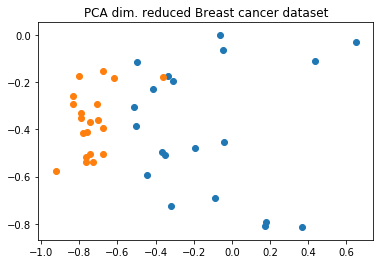

In [0]:
#obtenemos las muestras de training y test del dataset
sample_Total, training_input, test_input, class_labels = Breast_cancer(training_size=20,
                                                                       test_size=10,
                                                                       n=2,
                                                                       PLOT_DATA=True)

In [0]:
#aplicamos QSVM
seed = 10598

feature_map = SecondOrderExpansion(num_qubits=feature_dim, depth=2, entanglement='linear')
qsvm = QSVMKernel(feature_map, training_input, test_input)

backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed=seed, seed_mapper=seed)

result = qsvm.run(quantum_instance)

"""declarative approach, re-use the params above
algo_input = SVMInput(training_input, test_input)
result = run_algorithm(params, algo_input)
"""
print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  0.9


kernel matrix during the training:


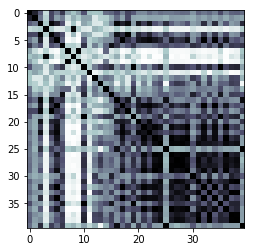

In [0]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()